#### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }<style>"))

#### Import dataset

In [3]:
df = pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


#### Separate X features & y labels

In [4]:
X = df.drop('sales', axis=1)
y = df['sales']

#### Split dataset into Training and Test

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Train the model on Training set

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #>> this is the model
regressor.fit(X_train, y_train)

LinearRegression()

#### Validate the model

In [7]:
# first lets do prediction
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [8]:
# second validate those predictions against historical values
new_df = pd.DataFrame({
    'y_pred': y_pred.round(1),
    'y_test': y_test.to_numpy()
})

new_df

,y_pred,y_test
0,10.1,11.3
1,7.5,8.4
2,7.0,8.7
3,24.1,25.4
4,12.0,11.7
5,6.5,8.7
6,12.8,7.2
7,15.1,13.2
8,10.8,9.2
9,16.3,16.6


Mean Absolute Error (MAE): 1.3575
It is the average of the absolute differences between the predicted values and the test values
Calc the absolute difference between test & predict (ex. |11.3-10.1|,|8.4-7.5|...etc, and get the average of all)
The lower the MAE, the better your models performance. Compare it against the average
Given that average sales is 14.0225 MEA looks really good

Mean Squared Error (MSE): 4.41375
Lower values indicate better model performance. 
Instead of calc absolute difference between test and predict, calculate the difference and square it, and get avg of all

Root Mean Squared Error (RMSE): 2.10089
It is the square root of the Mean Squared Error (MSE). Why do we square it? It Penalize Larger Errors
Again this is very low number

R-squared: 0.8597449
85.97% of the variance in the dependent variable can be explained by the independent variable in the model.
R-squared helps in assessing the fit of regression models. However, do not solely rely on R-squared to de

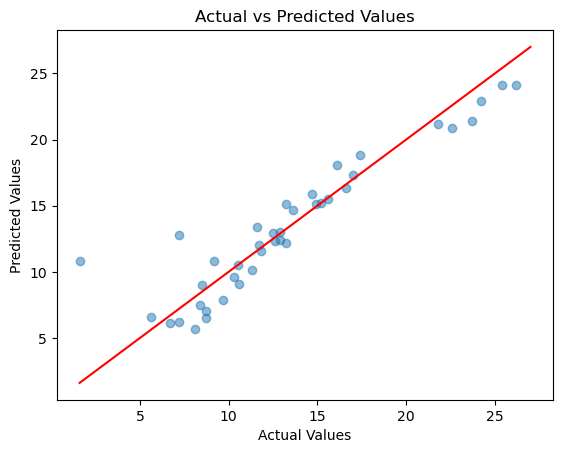

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Metrics to validate how good the model is

mae = mean_absolute_error(new_df['y_test'], new_df['y_pred']).round(5)
print(f"Mean Absolute Error (MAE): {mae}")
print('It is the average of the absolute differences between the predicted values and the test values')
print('Calc the absolute difference between test & predict (ex. |11.3-10.1|,|8.4-7.5|...etc, and get the average of all)')
print('The lower the MAE, the better your models performance. Compare it against the average')
avg_sales = round(df['sales'].mean(), 5)
print(f'Given that average sales is {avg_sales} MEA looks really good')
print()

mse = mean_squared_error(new_df['y_test'], new_df['y_pred']).round(5)
print(f"Mean Squared Error (MSE): {mse}")
print('Lower values indicate better model performance. ')
print('Instead of calc absolute difference between test and predict, calculate the difference and square it, and get avg of all')
print()

rmse = np.sqrt(mse).round(5)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print('It is the square root of the Mean Squared Error (MSE). Why do we square it? It Penalize Larger Errors')
print('Again this is very low number')
print()

r2 = r2_score(new_df['y_test'], new_df['y_pred']).round(7)
print(f"R-squared: {r2}")
print('85.97% of the variance in the dependent variable can be explained by the independent variable in the model.')
print('R-squared helps in assessing the fit of regression models. However, do not solely rely on R-squared to determine the best model')
print()

n = X.shape[0]
k = X.shape[1]
r2_adj = round((1 - (1 - r2) * (n - 1) / (n - k - 1)),7)
print(f"R-squared adjusted: {r2_adj}")
print('It penalizes the addition of unnecessary predictors that do not improve the models explanatory power.')
print('At this point try eliminating TV or Radio or Newspaper and see how the model looks')
print('Get these Rs as close as possible to each other')
print()

print('NOTE: Anything north of 60% of r2 is a good model. Less than that throw it, add/remove features/independent variables')

print()

intercept = regressor.intercept_
print(f"Intercept: {intercept}")
print('It is starting point of the regression line on the y-axis')
print('Value of dependent variable (target) when the independent variable (features) are zero')
print('if positive then target increases as features increase, if negative it is opposite')
print('in this case if the spend on TV and newspaper and radio goes up so does sale')

# Scatter Plot
plt.scatter(new_df['y_test'], new_df['y_pred'], alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

#### Predict future sales

In [10]:
# Predict new spending amounts
spending = {'TV': 160, 'radio': 30, 'newspaper': 20}
predicted_sales = regressor.predict([[spending['TV'], spending['radio'], spending['newspaper']]])
predicted_sales

C:\Users\btemo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.97])

###### If we spend 150 dollars on TV, 30 on radio and 20 on newspaper, we will generate 15.97 dollars. 
###### terrific!